In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import os
from datetime import datetime, timedelta

def int_to_dt(t):
    return pd.to_datetime(start_date) + timedelta(days=t)

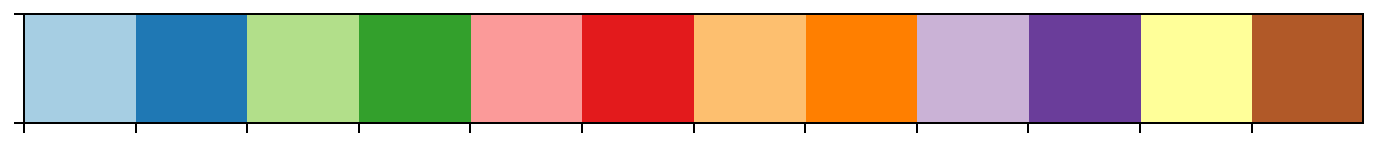

In [2]:
colors = sns.color_palette('Paired')
sns.palplot(colors)

In [3]:
job_id = '2020-05-09-deltat0-more-steps-normal'
output_folder = r'/Users/yoavram/Library/Mobile Documents/com~apple~CloudDocs/EffectiveNPI-Data/output/{}'.format(job_id)
table_path = os.path.join(output_folder, 'tables', 'all-countries-{}.csv'.format(job_id))
df = pd.read_csv(table_path)
df = df.rename(columns={'official_τ': 'τ official'})
df['country'] = df['country'].str.replace("_", " ")
df.head()

,country,DIC,loglik(MAP),loglik(mean),loglik(median),N,p_steps,p_τ_model,p_Td1,p_Td2,...,E0 MAP,Iu0 mean,Iu0 median,Iu0 MAP,Δt0 mean,Δt0 median,Δt0 MAP,τ mean.1,τ median.1,τ MAP.1
0,Sweden,-inf,-6.26,-360.97,-inf,10183175,1000000,TauModel.normal_prior,9,6,...,1.76,645.92,340.99,14.70,3.03,2.79,1.87,18.83,18.16,21.00
1,Belgium,-70.71,-10.74,-274.22,-62.93,11422068,1000000,TauModel.normal_prior,9,6,...,12.24,526.29,307.03,187.13,2.95,2.66,1.83,20.87,19.75,24.37
2,United Kingdom,-30.44,-11.76,-1003.71,-48.72,66488991,1000000,TauModel.normal_prior,9,6,...,117.83,359.58,163.83,101.69,2.74,2.42,1.50,29.86,32.94,25.26
3,Switzerland,-364.57,-27.21,-1146.62,-245.48,8516543,1000000,TauModel.normal_prior,9,6,...,13.61,309.14,103.17,56.92,2.19,1.86,1.03,27.20,28.38,29.85
4,Wuhan,-218.12,-28.05,-595.03,-172.88,10607700,1000000,TauModel.normal_prior,9,6,...,38.27,675.52,383.46,223.99,2.07,1.78,1.90,22.20,22.78,23.20


In [4]:
print(df.columns)
print(df.shape)

Index(['country', 'DIC', 'loglik(MAP)', 'loglik(mean)', 'loglik(median)', 'N',
       'p_steps', 'p_τ_model', 'p_Td1', 'p_Td2', 'τ official', 'τ mean',
       'τ median', 'τ MAP', 'official τ from 1 Jan', 'τ mean from 1 Jan',
       'τ median from 1 Jan', 'τ MAP from 1 Jan', 'τ CI median (75%)',
       'τ CI median (95%)', 'τ CI mean (75%)', 'τ CI mean (95%)', 'Z mean',
       'Z median', 'Z MAP', 'D mean', 'D median', 'D MAP', 'μ mean',
       'μ median', 'μ MAP', 'β mean', 'β median', 'β MAP', 'α1 mean',
       'α1 median', 'α1 MAP', 'λ mean', 'λ median', 'λ MAP', 'α2 mean',
       'α2 median', 'α2 MAP', 'E0 mean', 'E0 median', 'E0 MAP', 'Iu0 mean',
       'Iu0 median', 'Iu0 MAP', 'Δt0 mean', 'Δt0 median', 'Δt0 MAP',
       'τ mean.1', 'τ median.1', 'τ MAP.1'],
      dtype='object')
(12, 55)


In [5]:
countries = df['country'].unique()
country_color = {country: colors[i] for i, country in enumerate(countries)}
df['color'] = [country_color[country] for country in df['country']]

In [6]:
def date_to_int(x):
    dt = datetime.strptime(x + ' 2020', '%b %d %Y')
    td = dt - datetime(2020, 1, 1)
    return td.days
def date_to_date(x):
    dt = datetime.strptime(x + ' 2020', '%b %d %Y')
    return dt

df['τ mean days'] = [date_to_int(x) for x in df['τ mean']]
df['τ median days'] = [date_to_int(x) for x in df['τ median']]
df['τ MAP days'] = [date_to_int(x) for x in df['τ MAP']]
df['τ official days'] = [date_to_int(x) for x in df['τ official']]
df['τ official - mean days'] = df['τ official days'] - df['τ mean days']
df['τ official - median days'] = df['τ official days'] - df['τ median days']
df['τ official - MAP days'] = df['τ official days'] - df['τ MAP days']
df['τ mean'] = [date_to_date(x) for x in df['τ mean']]
df['τ median'] = [date_to_date(x) for x in df['τ median']]
df['τ MAP'] = [date_to_date(x) for x in df['τ MAP']]
df['τ official'] = [date_to_date(x) for x in df['τ official']]

df.head()

,country,DIC,loglik(MAP),loglik(mean),loglik(median),N,p_steps,p_τ_model,p_Td1,p_Td2,...,τ median.1,τ MAP.1,color,τ mean days,τ median days,τ MAP days,τ official days,τ official - mean days,τ official - median days,τ official - MAP days
0,Sweden,-inf,-6.26,-360.97,-inf,10183175,1000000,TauModel.normal_prior,9,6,...,18.16,21.00,"(0.6509803921568628, 0.807843137254902, 0.8901...",70,70,73,77,7,7,4
1,Belgium,-70.71,-10.74,-274.22,-62.93,11422068,1000000,TauModel.normal_prior,9,6,...,19.75,24.37,"(0.12156862745098039, 0.47058823529411764, 0.7...",76,75,80,77,1,2,-3
2,United Kingdom,-30.44,-11.76,-1003.71,-48.72,66488991,1000000,TauModel.normal_prior,9,6,...,32.94,25.26,"(0.6980392156862745, 0.8745098039215686, 0.541...",82,85,78,83,1,-2,5
3,Switzerland,-364.57,-27.21,-1146.62,-245.48,8516543,1000000,TauModel.normal_prior,9,6,...,28.38,29.85,"(0.2, 0.6274509803921569, 0.17254901960784313)",77,79,80,79,2,0,-1
4,Wuhan,-218.12,-28.05,-595.03,-172.88,10607700,1000000,TauModel.normal_prior,9,6,...,22.78,23.20,"(0.984313725490196, 0.6039215686274509, 0.6)",31,32,33,22,-9,-10,-11


## Compare $\tau$ posterior mean and posterior median

,τ median from 1 Jan,τ mean from 1 Jan
τ median from 1 Jan,1.000000,0.995906
τ mean from 1 Jan,0.995906,1.000000


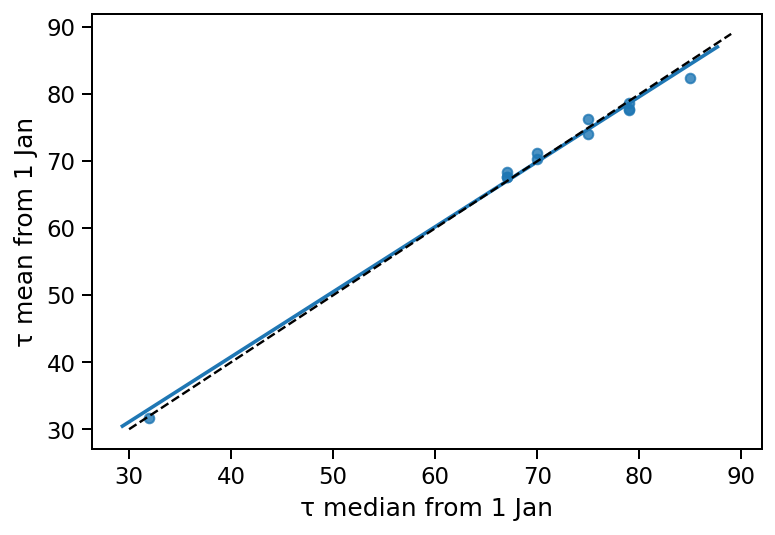

In [7]:
sns.regplot('τ median from 1 Jan', 'τ mean from 1 Jan', data=df, ci=False)
plt.plot(np.arange(30, 90), np.arange(30, 90), ls='--', color='k')


df[['τ median from 1 Jan', 'τ mean from 1 Jan']].corr()

,τ median from 1 Jan,τ MAP from 1 Jan
τ median from 1 Jan,1.000000,0.951097
τ MAP from 1 Jan,0.951097,1.000000


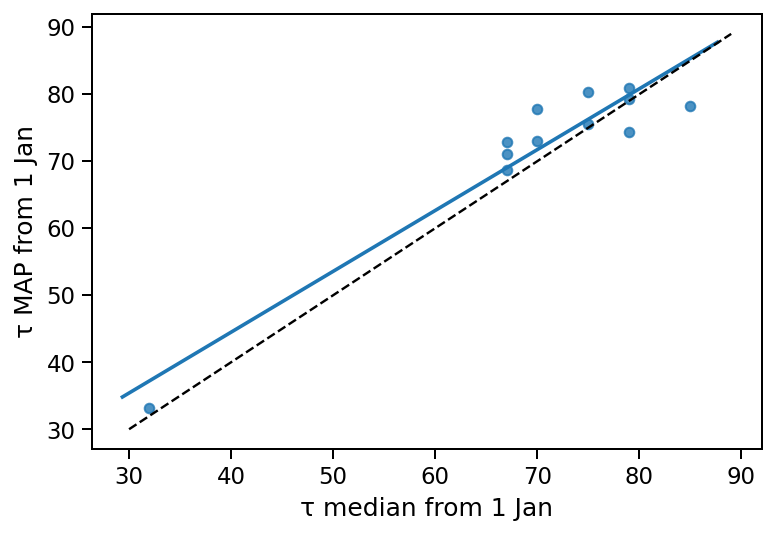

In [8]:
# df.plot.scatter('τ mean days', 'τ median days')
sns.regplot('τ median from 1 Jan', 'τ MAP from 1 Jan', data=df, ci=False)
plt.plot(np.arange(30, 90), np.arange(30, 90), ls='--', color='k')

df[['τ median from 1 Jan', 'τ MAP from 1 Jan']].corr()

# Compare $\tau^*$ and $\hat{\tau}$

In [9]:
date_range = [datetime(2020, 3, 1) + timedelta(weeks=2*i) for i in range(3)]
date_formatter = mpl.dates.DateFormatter('%b %d')

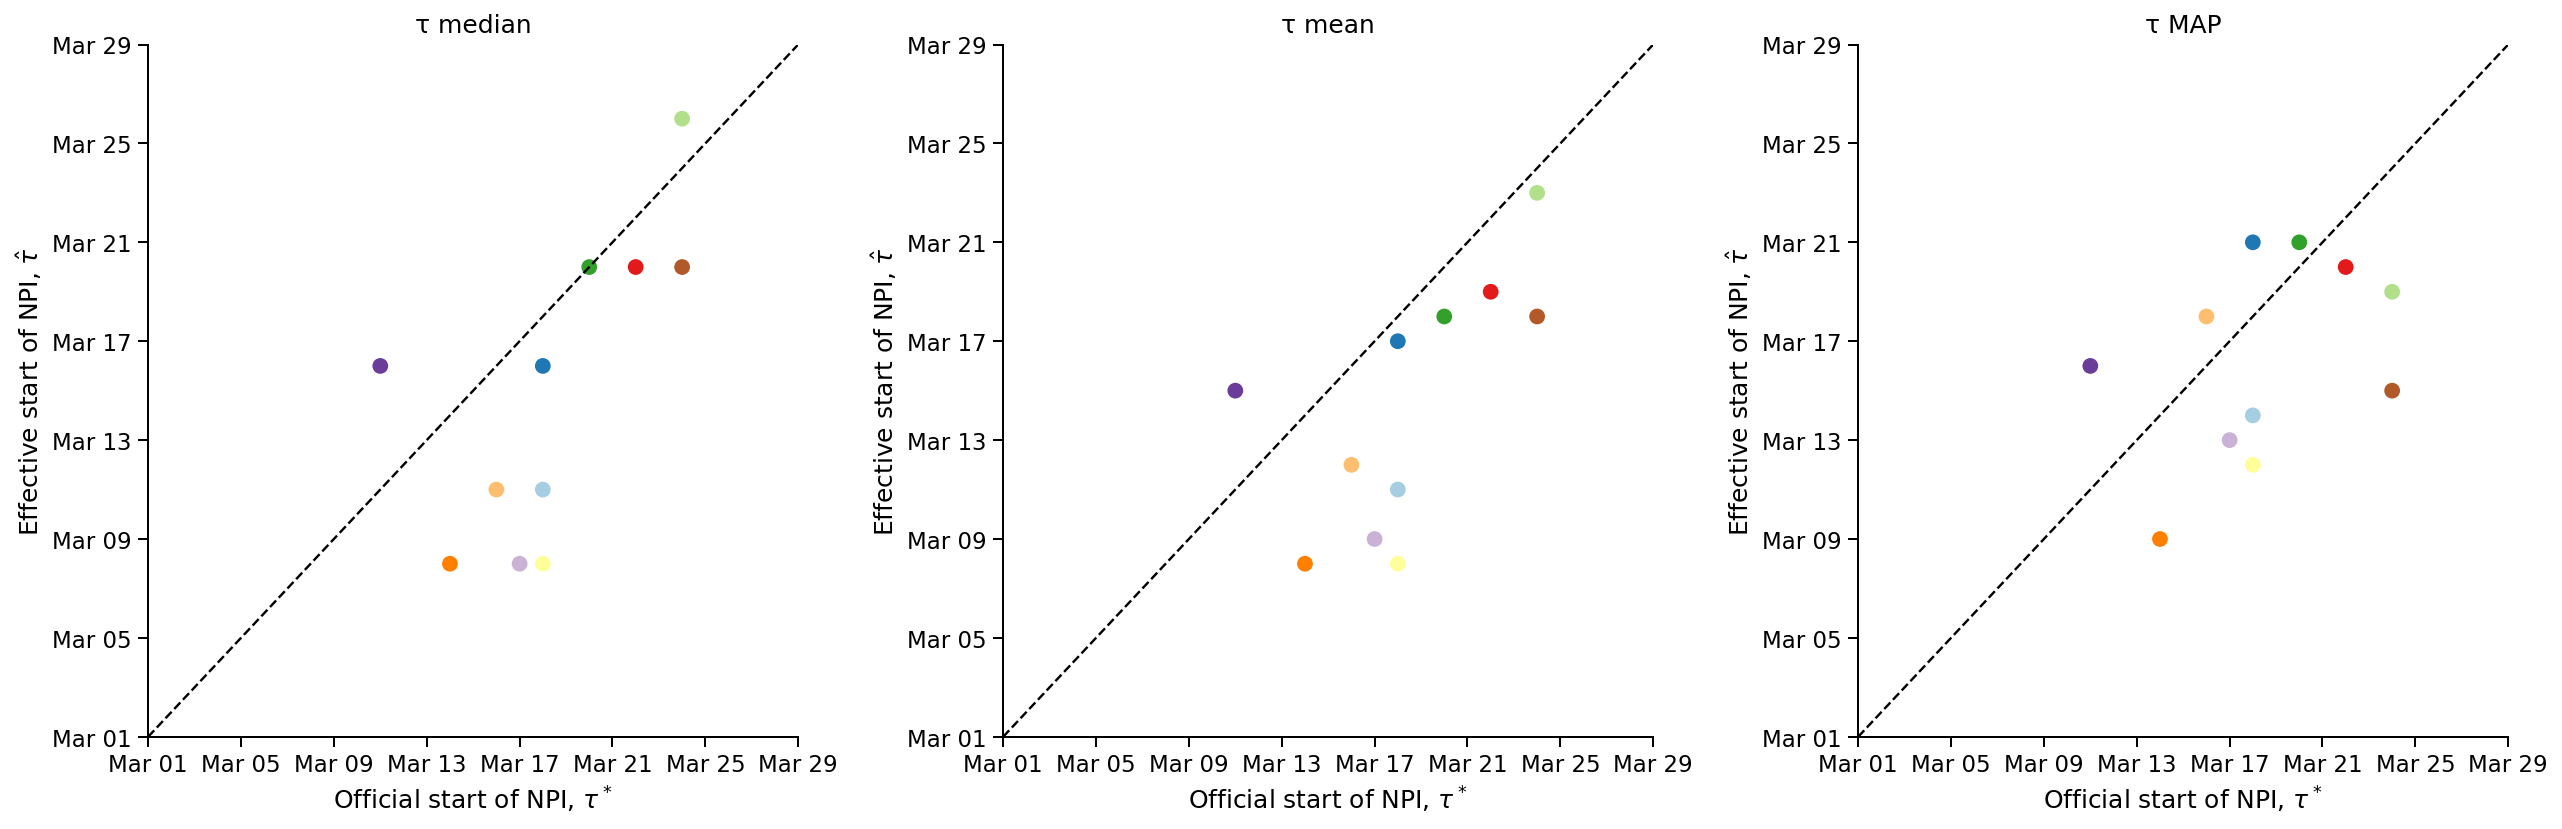

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for feature, ax in zip(['τ median', 'τ mean', 'τ MAP'], axes.flat):
    ax.scatter('τ official', feature, c='color', s=50, data=df)
    ax.plot(date_range, date_range, '--k')
    ax.set(
        title=feature,
        xlabel=r'Official start of NPI, $\tau^*$',
        ylabel=r'Effective start of NPI, $\hat{\tau}$',
        xlim=(min(date_range), max(date_range)),
        ylim=(min(date_range), max(date_range)),
    #     xticks=date_range[::2],
    #     yticks=date_range[::2],
    )
    ax.xaxis.set_major_formatter(date_formatter)
    ax.yaxis.set_major_formatter(date_formatter)
fig.tight_layout()
sns.despine()

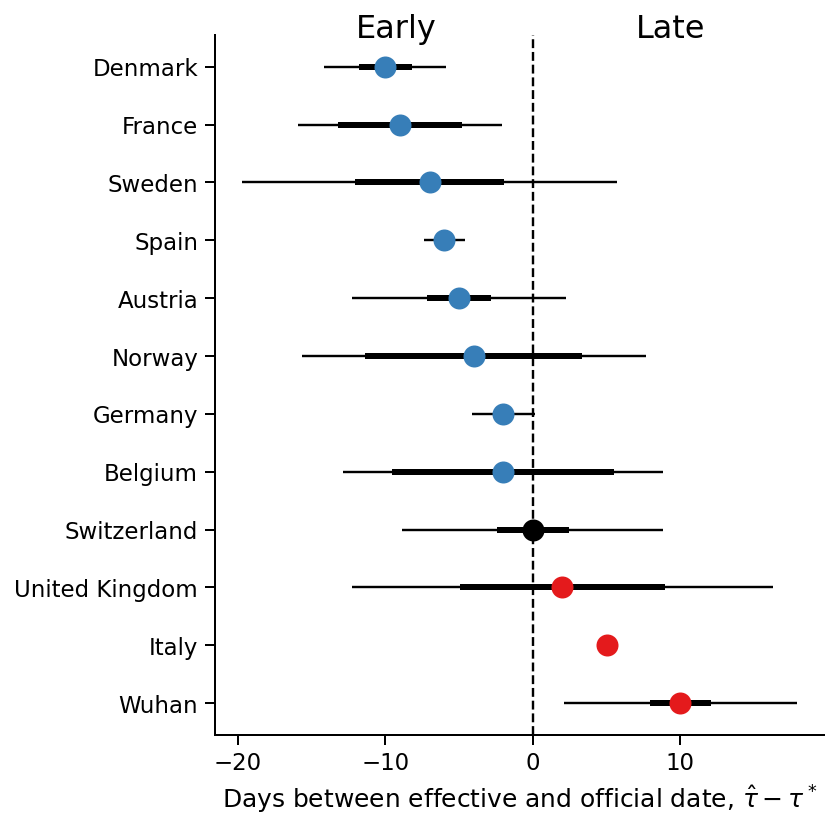

In [14]:
col = 'τ official - median days'
ci75_col = 'τ CI median (75%)'
ci95_col = 'τ CI median (95%)'

fig, ax = plt.subplots(figsize=(6, 6))
df_ = df.sort_values(col)

val = -df_[col]
ci75 = df_[ci75_col]
ci95 = df_[ci95_col]
country = df_['country']
ax.hlines(country, val-ci95, val+ci95)
ax.hlines(country, val-ci75, val+ci75, lw=3)

idx = df_[col] >= 1
val = -df_.loc[idx, col]
country = df_.loc[idx, 'country']
ax.plot(val, country, 'o', markersize=10, color=blue)


idx = df_[col] <= -1
val = -df_.loc[idx, col]
country = df_.loc[idx, 'country']
ax.plot(val, country, 'o', markersize=10, color=red)

idx = (-1 < df_[col]) & (df_[col] < 1)
val = -df_.loc[idx, col]
country = df_.loc[idx, 'country']
ax.plot(val, country, 'o', markersize=10, color='k')

plt.axvline(0, ls='--', color='k')
ax.set(
    xlabel=r'Days between effective and official date, $\hat{\tau} - \tau^*$',
)
ax.annotate('Late', (7, 11.5), fontsize=16)
ax.annotate('Early', (-12, 11.5), fontsize=16)
sns.despine()
plt.tight_layout()
# fig.savefig('../figures/Fig1.pdf', dpi=100)